In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
#from openmm import app
#import openmm as mm
#from openmm import unit as u
import pdbfixer
#import mdshare
#from sys import stdout

In [2]:
# #simulation_traj = md.load('data/output.pdb')###delete
# petide_in_water = md.load('data/peptide_model_water.pdb')###add
# simulation_traj = md.load_dcd('data/output.dcd',top=petide_in_water.top)###add
# traj_ANP = md.load('data/peptide_fixed.pdb')
# simulation_log_head = np.loadtxt('data/mm.log',dtype=str,max_rows=1,delimiter=',',comments=None)
# simulation_log = np.loadtxt('data/mm.log',delimiter=',')

In [3]:
# simulation_traj_2 = md.load_dcd('data/output_2.dcd',top=petide_in_water.top)###add
# simulation_log_head_2 = np.loadtxt('data/mm.log_2',dtype=str,max_rows=1,delimiter=',',comments=None)
# simulation_log_2 = np.loadtxt('data/mm.log_2',delimiter=',')

In [4]:
peptide_fixed = md.load('data/peptide_fixed.pdb')
petide = md.load('data/output_no_water.dcd',top=peptide_fixed.top)
simulation_log = np.loadtxt('data/mm.log',delimiter=',')
simulation_log_head = np.loadtxt('data/mm.log',dtype=str,max_rows=1,delimiter=',',comments=None)

#petide_2 = md.load_dcd('data/output_no_water_2.dcd',top=peptide_fixed.top)
#simulation_log_2 = np.loadtxt('data/mm_2.log',delimiter=',')
#simulation_log_head_2 = np.loadtxt('data/mm_2.log',dtype=str,max_rows=1,delimiter=',',comments=None)

In [5]:
sim_time = np.concatenate((simulation_log[:,1],simulation_log_2[:,1]))
petide_traj = md.join([petide,petide_2])

NameError: name 'simulation_log_2' is not defined

In [6]:
# #Cutting out the petide to do the rmsd
# simulation_top = simulation_traj.top
# selection_simulation = simulation_top.select('chainid 0')
# petide_simulation_traj = simulation_traj.atom_slice(selection_simulation)

In [7]:
#sim_time_2 = simulation_log_2[:,1]+sim_time[-1]

In [8]:
# #Cutting out the petide to do the rmsd
# simulation_top_2 = simulation_traj_2.top
# selection_simulation_2 = simulation_top_2.select('chainid 0')
# petide_simulation_traj_2 = simulation_traj_2.atom_slice(selection_simulation_2)

In [9]:
# t = np.concatenate((sim_time, sim_time_2), axis=None)###add
# petide_traj = md.join([petide_simulation_traj,petide_simulation_traj_2])###add

In [300]:
rmsd = md.rmsd(petide[0:100],peptide_fixed)#petide_simulation_traj

In [301]:
(petide)[0:100]

<mdtraj.Trajectory with 100 frames, 287 atoms, 21 residues, and unitcells at 0x7f88c8a75400>

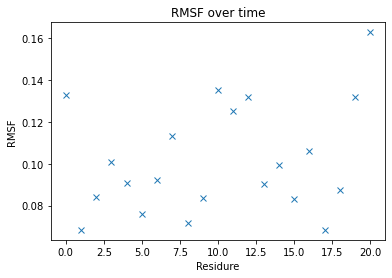

In [303]:
petide_simulation_top = petide.top
selection_petide_simulation_top = petide_simulation_top.select('name CA')
petide_simulation_traj_rsmf = petide.atom_slice(selection_petide_simulation_top)

traj_ANP_rsmf = peptide_fixed.top.select('name CA')

traj_ANP_traj_rsmf = peptide_fixed.atom_slice(traj_ANP_rsmf)

#rmsf = md.rmsf(petide_simulation_traj_rsmf,traj_ANP)
rmsf = md.rmsf(petide_simulation_traj_rsmf,traj_ANP_traj_rsmf)

plt.plot(rmsf,'x')
plt.xlabel('Residure')
plt.ylabel('RMSF')
plt.title('RMSF over time')
plt.show()

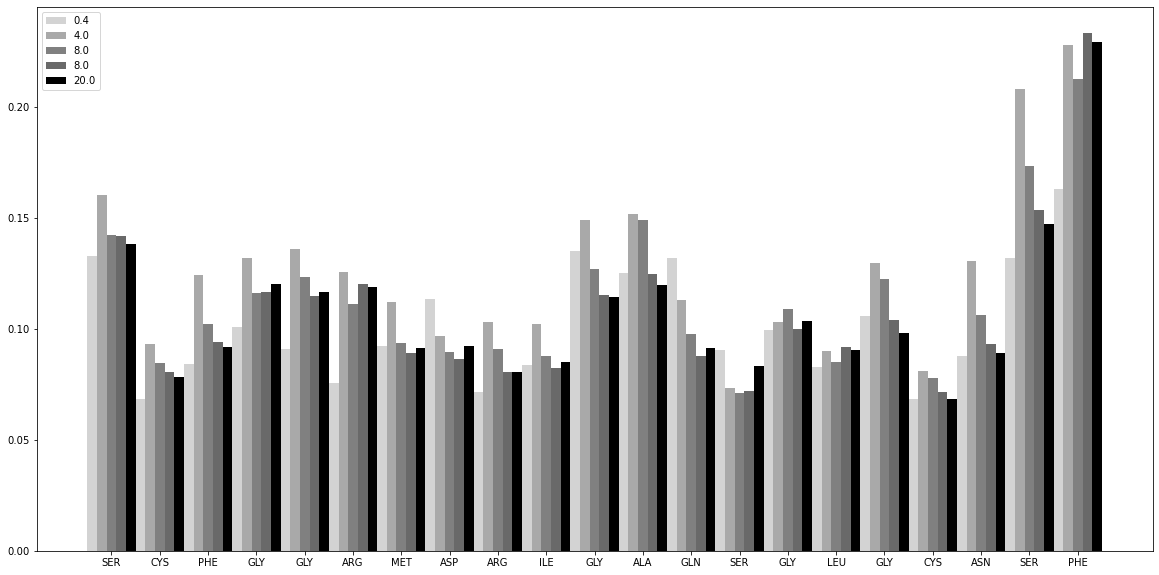

In [348]:
a = [residue for residue in petide_simulation_traj_rsmf.topology.residues] ## Gives Residues as a list

xticks = ['SER', 'CYS', 'PHE', 'GLY', 'GLY', 'ARG', 'MET', 'ASP', 'ARG', 'ILE', 'GLY', ##Setting ticks
       'ALA', 'GLN', 'SER', 'GLY', 'LEU', 'GLY', 'CYS', 'ASN', 'SER','PHE'] 


rmsf_1 = md.rmsf(petide_simulation_traj_rsmf[0:100],traj_ANP_traj_rsmf)
rmsf_2 = md.rmsf(petide_simulation_traj_rsmf[0:1000],traj_ANP_traj_rsmf)
rmsf_3 = md.rmsf(petide_simulation_traj_rsmf[0:2000],traj_ANP_traj_rsmf)
rmsf_4 = md.rmsf(petide_simulation_traj_rsmf[0:4000],traj_ANP_traj_rsmf)
rmsf = md.rmsf(petide_simulation_traj_rsmf,traj_ANP_traj_rsmf)

fig, ax = plt.subplots(figsize=(20,10))

x = np.arange(len(a))
#ax.plot(rmsf)#, color=colors[0], width=0.4, label=names[0])
ax.bar(x-0.4, rmsf_1,color='lightgrey', width=0.2,label = round(simulation_log[100,1]*0.001,1))
ax.bar(x-0.2, rmsf_2,color='darkgrey', width=0.2,label = round(simulation_log[1000,1]*0.001,1))
ax.bar(x, rmsf_3,color='grey', width=0.2,label = round(simulation_log[2000,1]*0.001,1))
ax.bar(x+0.2, rmsf_4,color='dimgrey', width=0.2,label = round(simulation_log[2000,1]*0.001,1))
ax.bar(x+0.4, rmsf,color='black', width=0.2,label = round(simulation_log[-1,1]*0.001,1))





#ax.bar(x+0.2, Scores[:,1], color=colors[1], width=0.4, label=names[1])
ax.set(xticks=x, xticklabels=xticks)
ax.legend()
plt.show()

array([4.0000e+00, 8.0000e+00, 1.2000e+01, ..., 1.9992e+04, 1.9996e+04,
       2.0000e+04])

array([4.0000e+00, 8.0000e+00, 1.2000e+01, ..., 1.9992e+04, 1.9996e+04,
       2.0000e+04])

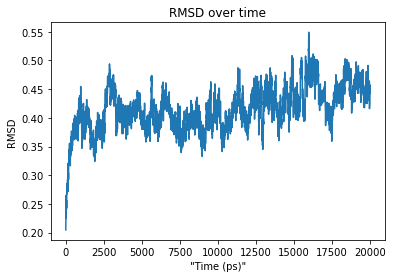

In [11]:
plt.plot(simulation_log[:,1],rmsd)#sim_time
plt.xlabel(simulation_log_head[1])
plt.ylabel('RMSD')
plt.title('RMSD over time')
plt.show()

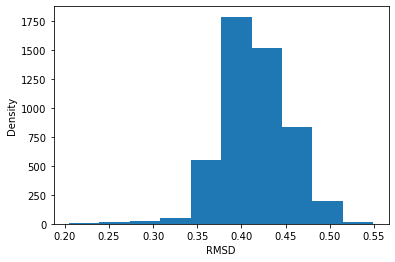

In [28]:
#rmsd = md.rmsd(petide_simulation_traj,traj_ANP)

hist,bins=np.histogram(rmsd)
plt.bar(bins[:-1], hist, width=(bins[-1]-bins[-2]), align="edge")
#np.histogram(rmsd,density)
##plt.bar(rmsd,density,bins=100)
plt.ylabel('Density')
plt.xlabel('RMSD')

plt.show()


In [2]:
import pyemma

In [3]:
featurizer = pyemma.coordinates.featurizer('data/peptide_fixed.pdb')
featurizer.add_distances_ca()
featurizer.add_backbone_torsions()
featurizer.add_sidechain_torsions()

/Users/milos/opt/miniconda3/envs/CMP/lib/python3.9/site-packages/pyemma/coordinates/data/featurization/angles.py:211: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(valid.values())


In [4]:
#featurizer.describe()

In [5]:
#help(pyemma.load)

# PCA & TICA

In [6]:
start = 1
end = 5000 #1000
data = pyemma.coordinates.load('data/output_no_water.dcd', features=featurizer)[start:end]

In [7]:
data[0].shape

(244,)

In [8]:
tica_obj = pyemma.coordinates.tica(data, lag=200).get_output()

/Users/milos/opt/miniconda3/envs/CMP/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /Users/milos/opt/miniconda3/envs/CMP/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


In [9]:
tica_obj[0].shape

(4999, 118)

(<Figure size 640x480 with 2 Axes>, <AxesSubplot: >)

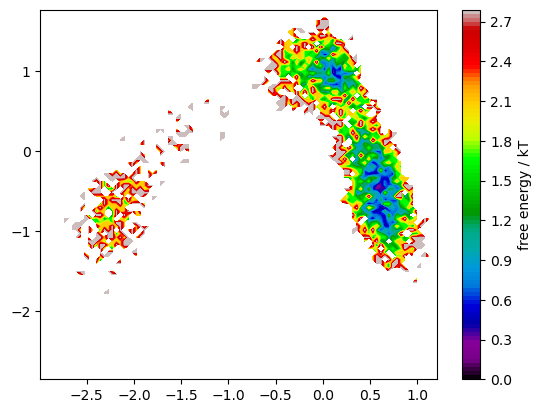

In [10]:
fig, ax = plt.subplots(1,1)
pyemma.plots.plot_free_energy(tica_obj[0].T[0], tica_obj[0].T[1], ax=ax )
#ax.scatter(tica_obj[0].T[0][::10], tica_obj[0].T[1][::10], c=simulation_log[:,1][start:end][::10])


In [46]:

start = 1
end = 10000

traj = md.load('./data/output_no_water.dcd',top='./data/peptide_fixed.pdb')

featurizer = pyemma.coordinates.featurizer('data/peptide_fixed.pdb')

tica_obj = pyemma.coordinates.tica(traj, lag=200)

featurizer.add_distances_ca()
featurizer.add_backbone_torsions()
featurizer.add_sidechain_torsions()

featurized_trajectory =  pyemma.coordinates.load(['data/output_no_water.dcd','./data/output_no_water_2.dcd','./data/output_no_water_3.dcd'], features=featurizer, stride=1)[start:end]

#cls = pyemma.coordinates.cluster_kmeans(featurized_trajectory, k=100, max_iter=200, stride=1)#max_iter max but it will treminate if conversion

#discrete_trajectories  = cls.dtrajs

# To estimate msm test with error bars, use bayessian msm
msm_bayesian = pyemma.msm.bayesian_markov_model(discrete_trajectories,  lag=200)

#nstates = 4
#ck_msm_bayesian = msm_bayesian.cktest(nstates)
#pyemma.plots.plot_cktest(ck_msm_bayesian)
#initial_structur = pyemma.coordinates.load('./data/output_no_water_3.dcd',features=featurizer)
crystal_tika = tica_obj[0].transform(initial_structur)

fig, ax = plt.subplots(1,1)
pyemma.plots.plot_free_energy(tica_obj[0].T[0], tica_obj[0].T[1], ax=ax 
                              ,weights=np.concatenate(msm_bayesian.trajectory_weights()))#Free energy reweighted by stationray distribution. if very differnt than not converged
#ax.scatter(crystal_tika[0,0:1],crystal_tika[0,1:2],color='red')


/Users/milos/opt/miniconda3/envs/CMP/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /Users/milos/opt/miniconda3/envs/CMP/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


In [38]:
initial_structur.shape

(10000, 244)

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

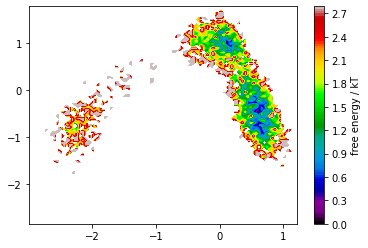

In [254]:
fig, ax = plt.subplots(1,1)
pyemma.plots.plot_free_energy(tica_obj[0].T[0], tica_obj[0].T[1], ax=ax )
#ax.scatter(tica_obj[0].T[0][::10], tica_obj[0].T[1][::10], c=simulation_log[:,1][start:end][::10])


In [255]:
PCA = pyemma.coordinates.pca(data,lag=200,n_components=3).get_output()

/Users/milos/opt/anaconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /Users/milos/opt/anaconda3/lib/python3.9/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)


(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

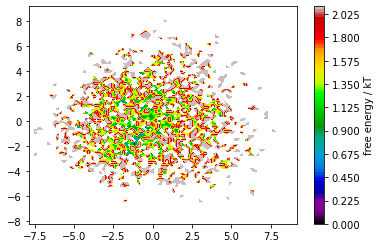

In [256]:
fig, ax = plt.subplots(1,1)
pyemma.plots.plot_free_energy(PCA[0].T[0], PCA[0].T[1], ax=ax )
#ax.scatter(PCA[0].T[0][::10], PCA[0].T[1][::10], c=simulation_log[:,1][start:end][::10])


(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

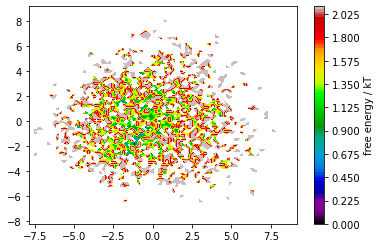

In [190]:
fig, ax = plt.subplots(1,1)
pyemma.plots.plot_free_energy(PCA[0].T[0], PCA[0].T[1], ax=ax )
#ax.scatter(PCA[0].T[0][::10], PCA[0].T[1][::10], c=simulation_log[:,1][start:end][::10])


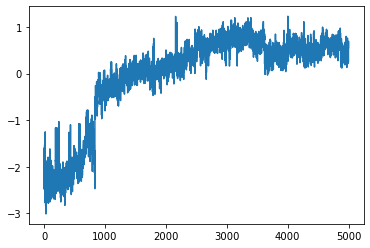

In [269]:
plt.plot(tica_obj[0].T[0])

In [265]:
#np.shape(PCA)#.shape

In [96]:
def compute_distances(pos):
    """Compute all distances between the atoms in each structures using scipy's `pdist` function.
    
    pos: [n_structures, n_atoms, 3]
    return: [n_structures, n_distances]
    """
    pos = np.asarray(pos)
    X = []
    for ii in range(pos.shape[0]):
        d = pdist(pos[ii])
        X.append(d)
    return np.asarray(X)

def compute_gyration_radius(pos):
    """Compute the gyration radius associated with each structures.
    
    pos: [n_structures, n_atoms, 3]
    return: [n_structures, ]
    """
    pos = np.asarray(pos)
    gyration_radius = []
    for ii in tqdm(range(pos.shape[0])):
        d2 = pdist(pos[ii]) ** 2
        S = np.sqrt(d2.sum() / (pos.shape[1]+1)**2)
        gyration_radius.append(S)
    gyration_radius = np.array(gyration_radius)
    return gyration_radius

In [266]:

pos = petide.xyz

In [102]:
from tqdm import tqdm
from scipy.spatial.distance import pdist,squareform

100%|█████████████████████████████████████| 5000/5000 [00:00<00:00, 6540.74it/s]


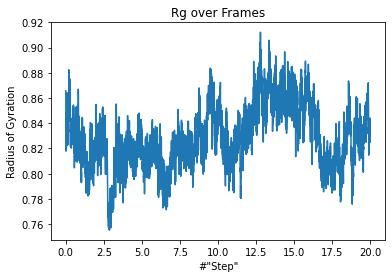

In [105]:
plt.plot(simulation_log[:,1]*0.001,compute_gyration_radius(pos))

plt.xlabel(simulation_log_head[0])
plt.ylabel('Radius of Gyration')
plt.title('Rg over Frames')
plt.show()

In [110]:
import matplotlib.pyplot as plt

import numpy as np
import scipy as sc
import numpy.linalg as npl
from numpy.linalg import norm
import scipy.linalg as scl
from scipy.spatial.distance import pdist,squareform
import ase
from tqdm.notebook import tqdm
import pickle as pck
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from deeptime.decomposition import TICA
import seaborn as sns

# to instal nglview | you will have to restart any jupyter instance running
# for the changes to apply
# conda install nglview -c conda-forge
# conda upgrade nglview --force
from nglview import show_asetraj,show_ase
import numpy as np
import ase
from ase import Atoms
from ase.visualize import view
from ipywidgets import interactive,FloatSlider,interact
import matplotlib.pyplot as plt
# conda install chemiscope
import chemiscope

In [111]:
def Tica(pos_):
    
    dist=compute_distances(np.array(pos_))
    
    model= TICA(lagtime=1,dim=1)
    model.fit(dist)
    
    final_model=model.fetch_model()
    
    
    Tic1= final_model.transform(dist)
    #Tic1=Tic1[0]
    #print(Tic1)

    
    properties = {
        "id": np.arange(Tic1.shape[0]),
        "TIC1": Tic1[:,0]
    }

    
    
    return properties
    
    
    

In [114]:
Tica1 = Tica(pos[:,::10])#
R_o_G = compute_gyration_radius(pos)

  0%|          | 0/5000 [00:00<?, ?it/s]

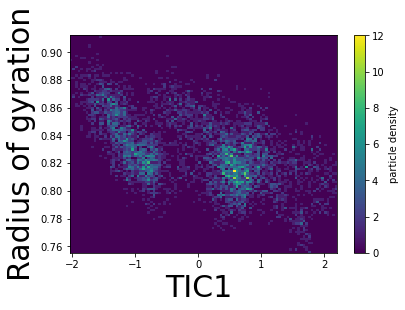

In [115]:


plt.ylabel('Radius of gyration',fontsize=30)
plt.xlabel('TIC1 ',fontsize=30)

counts, xedges, yedges, im =plt.hist2d(Tica1['TIC1'],R_o_G,bins=100);


cbar = plt.colorbar(im)
cbar.set_label("particle density")

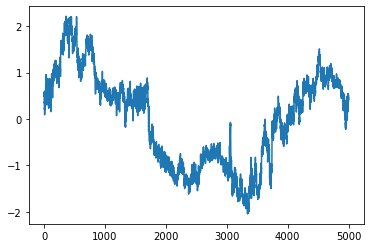

In [120]:
plt.plot(Tica1['id'],Tica1['TIC1'])

In [162]:
def display_trajectory(pos, stride):
    Natom,_ = pos[0].shape
    num = [1]*Natom
    xsize,ysize = 600,300
    frames = [Atoms(numbers=num,positions=pp,pbc=False) for pp in pos[::stride]]
    view = show_asetraj(frames, gui=False)
    view.clear_representations()
    view.representations = [
    {"type": "stick", "params": {
        "aspectRatio": 4,'color': "residureindex",
    }},
    {"type": "distance", "params": {
        "atomPair": [[it,it+1] for it in range(Natom-1)],
        'colorScheme': "black",
    'labelSize': 4,
    'labelColor': "white",
    'labelVisible': False,
    'labelUnit': "angstrom",
    'radiusScale': .1,
    'opacity': 1,
    'name': "link",
    'side': "front",
    'useCylinder': True
    }}
    ]
    view._remote_call('setSize', target='Widget',
                               args=['%dpx' % (xsize,), '%dpx' % (ysize,)])
    return view

# show a polymer trajectory along with associated properties

def display_trajectory_and_property(pos, properties):
    """
    properties: dictionary of properties associated with each structures, e.g.
        ```
        properties = {
            "id": np.arange(TIC.shape[0]),
            "TIC1": TIC[:,0]
        }
        ```
        where `TIC` is an array containing the TICA projection of shape [n_structure, n_tica]

    """
    frames = [Atoms(positions=pp, numbers=6*np.ones(100)) for pp in pos]
    widget = chemiscope.show(frames, properties)
    # display the dataset in a chemiscope visualizer inside the notebook
    return widget

In [163]:
display_trajectory(pos, stride=10)

NGLWidget(max_frame=499)

In [176]:
import matplotlib.pyplot as plt

import numpy as np
import scipy as sc
import numpy.linalg as npl
from numpy.linalg import norm
import scipy.linalg as scl
from scipy.spatial.distance import pdist,squareform
import ase
from tqdm.notebook import tqdm
import pickle as pck
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from deeptime.decomposition import TICA
import seaborn as sns

# to instal nglview | you will have to restart any jupyter instance running
# for the changes to apply
# conda install nglview -c conda-forge
# conda upgrade nglview --force
from nglview import show_asetraj,show_ase
import numpy as np
import ase
from ase import Atoms
from ase.visualize import view
from ipywidgets import interactive,FloatSlider,interact
import matplotlib.pyplot as plt
# conda install chemiscope
import chemiscope

# -----

In [228]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
from sklearn.decomposition import PCA
from deeptime.decomposition import TICA

import pickle as pck

In [229]:
traj = np.array(pos[0])

In [230]:
pca = PCA()
X_r = pca.fit(pos[0]).transform(pos[0])

print(f'First principal component: {pca.components_[0]}')
print(f'Second principal component: {pca.components_[1]}')

tica = TICA(lagtime=1)
tica_model = tica.fit(traj, lagtime=1).fetch_model()  # fit and fetch model
X_tica = tica_model.transform(traj)

print(f'First independent component: {tica_model.singular_vectors_left[:, 0]}')
print(f'Second independent component: {tica_model.singular_vectors_left[:, 1]}')

First principal component: [ 0.17499948  0.6190158  -0.7656335 ]
Second principal component: [ 0.953413   -0.30061984 -0.02513167]
First independent component: [ 0.15315981 -1.06199396  1.08191281]
Second independent component: [ 1.86354643 -0.39439101 -0.31945436]


In [236]:
np.shape(X_r)

(287, 3)

In [242]:
np.shape(traj)

(287, 3)

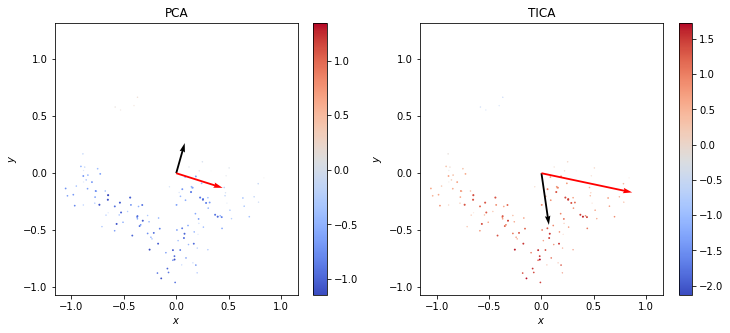

In [240]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

cm1 = ax1.scatter(*traj.T, c=X_r[:,0], cmap='coolwarm')#, s=(np.ones(np.shape(traj.T))))
f.colorbar(cm1,ax=ax1)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title('PCA')

# first/second principal components
dxy = pca.components_[0]  
dxy1 = pca.components_[1]

#ax1.scatter(*(pos.T), marker='.')#, s=1)
ax1.quiver(0, 0, dxy[0], dxy[1], scale = 5)
ax1.quiver(0, 0, dxy1[0], dxy1[1], scale = 5, color='red')

cm2 = ax2.scatter(*traj.T, c=X_tica[:,0], cmap='coolwarm')#, s=6)
f.colorbar(cm2,ax=ax2)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_title('TICA')

# first/second principal components
dxy_tic = np.array([ 0.15315981, -1.06199396,  1.08191281])
dxy1_tic = np.array([ 1.86354643, -0.39439101, -0.31945436])

#ax1.scatter(*(pos.T), marker='.')#, s=1)
ax2.quiver(0, 0, dxy_tic[0], dxy_tic[1], scale = 5)
ax2.quiver(0, 0, dxy1_tic[0], dxy1_tic[1], scale = 5, color='red')

plt.show()

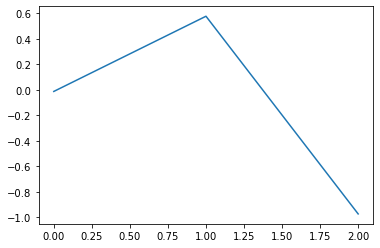

In [213]:
plt.plot(pos[0][0])

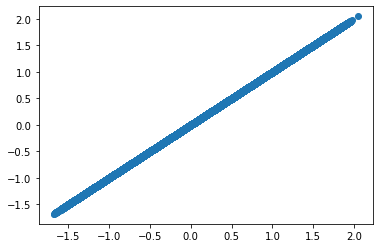

In [219]:
plt.scatter(pos[:,:],pos[:,:])

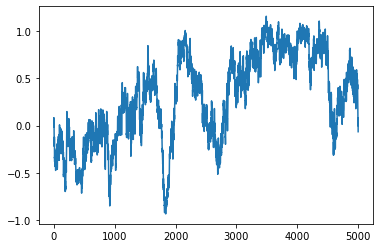

In [224]:
plt.plot(pos[:,0,0])